In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class DigitANN(nn.Module):
    def __init__(self):
        super(DigitANN, self).__init__()
        # A simple feedforward network
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer: 28x28 pixels flattened to 784
        self.fc2 = nn.Linear(128, 64)       # Hidden layer
        self.fc3 = nn.Linear(64, 10)        # Output layer: 10 classes (digits 0-9)
    
    def forward(self, x):
        # Flatten the input image
        x = x.view(-1, 28 * 28)
        # Feed forward through the network with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
# Hyperparameters
batch_size = 64
epochs = 5
learning_rate = 0.001

In [7]:
# Define data transforms and load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = DigitANN()
criterion = nn.CrossEntropyLoss()  # Cross entropy for classification tasks
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9912422/9912422 [00:02<00:00, 4682205.72it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28881/28881 [00:00<00:00, 769926.99it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1648877/1648877 [00:00<00:00, 6687997.87it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4542/4542 [00:00<00:00, 4679569.83it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [8]:
# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

# Save the trained model
torch.save(model.state_dict(), 'mnist_ann_model.pth')
print('Model trained and saved as "mnist_ann_model.pth"')

Epoch [1/5], Step [1/938], Loss: 0.0230
Epoch [1/5], Step [101/938], Loss: 1.0029
Epoch [1/5], Step [201/938], Loss: 0.4259
Epoch [1/5], Step [301/938], Loss: 0.3801
Epoch [1/5], Step [401/938], Loss: 0.3457
Epoch [1/5], Step [501/938], Loss: 0.3130
Epoch [1/5], Step [601/938], Loss: 0.2773
Epoch [1/5], Step [701/938], Loss: 0.2900
Epoch [1/5], Step [801/938], Loss: 0.2506
Epoch [1/5], Step [901/938], Loss: 0.2439
Epoch [2/5], Step [1/938], Loss: 0.0040
Epoch [2/5], Step [101/938], Loss: 0.2116
Epoch [2/5], Step [201/938], Loss: 0.2020
Epoch [2/5], Step [301/938], Loss: 0.2016
Epoch [2/5], Step [401/938], Loss: 0.2003
Epoch [2/5], Step [501/938], Loss: 0.1724
Epoch [2/5], Step [601/938], Loss: 0.1890
Epoch [2/5], Step [701/938], Loss: 0.1655
Epoch [2/5], Step [801/938], Loss: 0.1682
Epoch [2/5], Step [901/938], Loss: 0.1644
Epoch [3/5], Step [1/938], Loss: 0.0010
Epoch [3/5], Step [101/938], Loss: 0.1394
Epoch [3/5], Step [201/938], Loss: 0.1437
Epoch [3/5], Step [301/938], Loss: 0.138

Predicted digit: 7


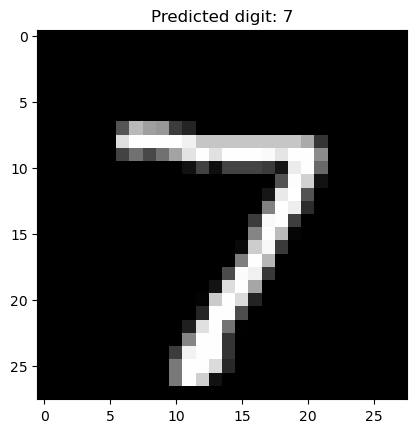

In [28]:
model = DigitANN()
model.load_state_dict(torch.load('mnist_ann_model.pth'))
model.eval()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the test dataset
test_dataset = datasets.MNIST('.', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# Grab a random image from the test dataset and test the model
data, target = next(iter(test_loader))

# Make the prediction
with torch.no_grad():
    output = model(data)
    _, predicted = torch.max(output, 1)

# Print the predicted digit
print(f'Predicted digit: {predicted.item()}')

# Display the image
image = data[0].numpy().squeeze()  # Convert the image tensor to numpy and remove the extra dimension
plt.imshow(image, cmap='gray')
plt.title(f"Predicted digit: {predicted.item()}")
plt.show()

In [31]:
class DrawingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Draw a Digit")
        self.root.geometry("300x350")
        
        self.canvas = tk.Canvas(self.root, width=280, height=280, bg="black")
        self.canvas.pack(pady=10)
        
        self.canvas.bind("<B1-Motion>", self.draw)  # Draw on mouse drag
        self.canvas.bind("<ButtonRelease-1>", self.predict_digit)  # Predict on mouse release
        
        # Create a blank black image (background is black)
        self.image = Image.new("L", (280, 280), color="black")
        self.draw_obj = ImageDraw.Draw(self.image)
        
        self.clear_button = tk.Button(self.root, text="Clear", command=self.clear_canvas)
        self.clear_button.pack()

        # For keeping track of the previous position (needed for interpolation)
        self.prev_x, self.prev_y = None, None
        
    def draw(self, event):
        """Draw on the canvas with the mouse, interpolate between points if moving fast."""
        x, y = event.x, event.y
        
        if self.prev_x is not None and self.prev_y is not None:
            # Calculate the distance between the previous point and the current point
            dx = x - self.prev_x
            dy = y - self.prev_y
            distance = (dx**2 + dy**2)**0.5  # Euclidean distance
            
            # If the distance is large, interpolate points between previous and current positions
            if distance > 2:
                steps = int(distance / 2)  # Number of intermediate points to draw
                for i in range(steps):
                    # Interpolate between the previous and current positions
                    inter_x = int(self.prev_x + (dx * i / steps))
                    inter_y = int(self.prev_y + (dy * i / steps))
                    self.canvas.create_oval(inter_x - 2, inter_y - 2, inter_x + 2, inter_y + 2, fill="white", outline="white")
                    self.draw_obj.line([inter_x - 2, inter_y - 2, inter_x + 2, inter_y + 2], fill="white", width=4)
        
        # Draw the current point (in case the movement wasn't fast enough for interpolation)
        self.canvas.create_oval(x - 2, y - 2, x + 2, y + 2, fill="white", outline="white")
        self.draw_obj.line([x - 2, y - 2, x + 2, y + 2], fill="white", width=4)
        
        # Save the current position for the next event
        self.prev_x, self.prev_y = x, y
        
        # Update the PIL image (draw white on black background)
        self.draw_obj.line([x-2, y-2, x+2, y+2], fill="white", width=4)

    def clear_canvas(self):
        """Clear the canvas and reset the image."""
        self.canvas.delete("all")  # Clear the canvas
        self.image = Image.new("L", (280, 280), color="black")  # Reset to black background
        self.draw_obj = ImageDraw.Draw(self.image)
        self.prev_x, self.prev_y = None, None

    def predict_digit(self, event):
        """Process the drawn image and make a prediction."""
        # Convert the image to 28x28 for MNIST model
        img_resized = self.image.resize((28, 28), Image.LANCZOS).convert("L")
        
        # Convert image to numpy array and normalize it to [0, 1]
        img_array = np.array(img_resized) / 255.0
        
        # Apply transformation (you might need to modify this depending on your model)
        img_tensor = transform(img_resized).unsqueeze(0)  # Add batch dimension
        
        # Predict the digit with the model
        with torch.no_grad():
            output = model(img_tensor)  # Run through the model
            _, predicted = torch.max(output, 1)  # Get the predicted class (digit)
        
        predicted_digit = predicted.item()
        
        # Display the prediction
        messagebox.showinfo("Prediction", f"Predicted Digit: {predicted_digit}")
        
        # Optionally, clear the canvas after prediction
        # self.clear_canvas()

# Create the Tkinter window
root = tk.Tk()
app = DrawingApp(root)
root.mainloop()